In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

import datetime
from datetime import datetime

from os import path
import os
from PIL import Image
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
os.listdir('drive/MyDrive/Freelance/Clustering/Data/')

['2023.xls',
 '2022.xls',
 'DATA EXCEL DATA PENUALAN SMARTPHONE 2022-2023.00.zip']

In [4]:
# Ambil data
df22 = pd.read_excel('2022.xls')
df23 = pd.read_excel('2023.xls')

# Penggabungan data
gabung = [df22, df23]
df = pd.concat(gabung)

df.head()

,Tanggal,NamaPelanggan,Referensi,NamaBarang,IMEI,Merk,NamaGudang,Jumlah,Harga
0,2022-01-01,CASH,NaN,OPPO A15s 4/64 GB HITAM DINAMIS,867756053331095,OPPO,CARIN CELL WACHID HASYIM,1,2200000
1,2022-01-01,CASH,NaN,"APPLE MACBOOK PRO 13"" CHIP M1,CPU 8CORE, GPU 8...",sn:/SC02G84X7Q05F,APPLE,CARIN CELL 1,1,23500000
2,2022-01-01,CASH,NaN,OPPO A53 4/128 GB HITAM,863491056371054,OPPO,CARIN CELL 1,1,2700000
3,2022-01-01,CASH,NaN,NOKIA 105 PLUS DUAL SIM BLACK,353123113663176,NOKIA,GUDANG UTAMA AHMAD DAHLAN,1,240000
4,2022-01-01,CASH,NaN,MODEM USB (MIFI) HUAWEI E5576 + TELKOMSEL,865621042273414,HUAWEI,CARIN CELL 1,1,750000


In [5]:
df = df[['Tanggal', 'NamaBarang', 'Merk', 'NamaGudang', 'Jumlah', 'Harga']]
df["Id"] = df.index + 1
first_column = df.pop('Id')
df.insert(0, 'Id', first_column)
df.tail()

,Id,Tanggal,NamaBarang,Merk,NamaGudang,Jumlah,Harga
13269,13270,2023-07-24,XIAOMI REDMI PAD 6/128 GB GRAPHITE GRAY,XIAOMI,CC5,1,3500000
13270,13271,2023-07-24,REALME C55 8/256 GB HITAM MALAM,REALME,CARIN CELL WACHID HASYIM,1,3000000
13271,13272,2023-07-24,SAMSUNG GALAXI A04 2022 4/64 GB GREEN,SAMSUNG,CARIN CELL 3,1,1600000
13272,13273,2023-07-24,MODEM WIFI HKM-M21 + TELKOMSEL 14 GB,HKM,CARIN CELL 3,1,600000
13273,13274,2023-07-24,VIVO Y02 3/32 GB ORCHID BLUE,VIVO,CARIN CELL LOAJANAN,1,1400000


<h1>Pembuatan fungsi preprocessing

In [6]:
# Pembuatan fungsi untuk preprocessing data
# Menghapus yang value yang bukan smartphone
def Menghapus_NonSmartphone(data):
  data = data.loc[data['NamaBarang'].str.contains('LAPTOP')==False]
  data = data.loc[data['NamaBarang'].str.contains('PRINTER')==False]
  data = data.loc[data['NamaBarang'].str.contains('MACBOOK')==False]
  data = data.loc[data['NamaBarang'].str.contains('USB')==False]
  data = data.loc[data['NamaBarang'].str.contains('LAPTOP')==False]
  data = data.loc[data['NamaBarang'].str.contains('MACBOOK')==False]
  data = data.loc[data['NamaBarang'].str.contains('MODEM')==False]
  data = data.loc[data['NamaBarang'].str.contains('PRINTER')==False]
  data = data.loc[data['NamaBarang'].str.contains('USB')==False]
  data = data.loc[data['NamaBarang'].str.contains('TV')==False]
  data = data.loc[data['NamaBarang'].str.contains('AIRPODS')==False]
  data = data.loc[data['NamaBarang'].str.contains('WATCH')==False]
  data = data.loc[data['NamaBarang'].str.contains('PENCIL')==False]
  data = data.loc[data['NamaBarang'].str.contains('HEADSET')==False]
  data = data.loc[data['NamaBarang'].str.contains('BUDS')==False]
  data = data.loc[data['NamaBarang'].str.contains('BLUETOOTH')==False]
  data = data.loc[data['NamaBarang'].str.contains('CAMERA')==False]
  data = data.loc[data['NamaBarang'].str.contains('WI FI')==False]
  data = data.loc[data['NamaBarang'].str.contains('CABLE DATA')==False]
  data = data.loc[data['NamaBarang'].str.contains('COVER')==False]
  data = data.loc[data['NamaBarang'].str.contains('MICROWAVE')==False]
  return data

<h1>Function Visualization</h1>

In [7]:
# Function countPercent_plot

def vis_ax(data, columns, x_ax, y_ax):
  plt.figure(figsize=(10,8))
  plt.subplots_adjust(hspace=0.5)
  for index, i in enumerate(columns):
      ax = plt.subplot(x_ax, y_ax, index + 1)
      splot = data[i].value_counts().sort_values(ascending=True).plot(kind='barh', color='#ff7675', ax=ax, figsize=(10,8)) # figsize(x,y)
      for c in splot.containers:
        splot.bar_label(c, fmt='%.0f', label_type='edge')

      plt.suptitle('Cluster {}'.format(data.Cluster.values[0]))
      ax.set_title('Count of {}\n'.format(i))
      ax.set_xticklabels(ax.get_xticklabels(),rotation=45, fontsize=8) # Rotating xticks using axis
      sns.despine(right=True,top = True)
      plt.tight_layout()

  plt.show()

<h1>Explore Data

melihat kolom gudang

In [8]:
# Melihat nama gudang
df['NamaGudang'].value_counts()

CARIN CELL 1                        8540
CC5                                 5735
M YAMIN                             5555
GUDANG UTAMA AHMAD DAHLAN           5492
CARIN CELL LOAJANAN                 4403
CARIN CELL 3                        3312
CARIN CELL WACHID HASYIM            3116
CARIN CELL LAMBUNG                  3063
CARIN CELL JAKARTA                   591
GUDANG BESI D.JEMPANG                 96
LDU , DEMOUNIT , ADMIN ONLINE         22
GUDANG UTAMA                          11
MINE GADGET ( ILYAS DAN ICHANK )       4
RETURAN                                2
Name: NamaGudang, dtype: int64

Mengambil "NamaGudang" hanya di GUDANG UTAMA AHMAD DAHLAN <br>
karena penelitian ini pada Carin Cell Pusat UTAMA AHMAD DAHLAN

In [9]:
# Pengambilan data hanya di cabang utama ahmad dahlan
df = df.loc[df['NamaGudang'] == 'GUDANG UTAMA AHMAD DAHLAN']
df['NamaGudang'].value_counts()

GUDANG UTAMA AHMAD DAHLAN    5492
Name: NamaGudang, dtype: int64

melihat kolom merk

In [10]:
df['Merk'].value_counts()

XIAOMI          1560
REALME          1330
INFINIX         1161
NOKIA            558
I PHONE          550
APPLE            108
SECOND            88
TECNO             53
LDU               23
ITEL              15
VIVO              10
SAMSUNG            9
HUAWEI             7
ASUS               6
ADVAN              5
OPPO               5
IPAD               2
HONOR              1
TECNO MOBILE       1
Name: Merk, dtype: int64

Melihat data merk diatas, terdapat data yang tidak sesuai brand<br>
maka dari itu dilakukan perubahan nilai value dari "I PHONE" menjadi "IPHONE"

melihat kolom nama barang

In [11]:
print(df.loc[df['NamaBarang'].str.contains('LAPTOP')==True].head(1))
print(df.loc[df['NamaBarang'].str.contains('MACBOOK')==True].head(1))
print(df.loc[df['NamaBarang'].str.contains('MODEM')==True].head(1))
print(df.loc[df['NamaBarang'].str.contains('PRINTER')==True].head(1))
print(df.loc[df['NamaBarang'].str.contains('USB')==True].head(1))
print(df.loc[df['NamaBarang'].str.contains('TV')==True].head(1))
print(df.loc[df['NamaBarang'].str.contains('AIRPODS')==True].head(1))
print(df.loc[df['NamaBarang'].str.contains('WATCH')==True].head(1))

Empty DataFrame
Columns: [Id, Tanggal, NamaBarang, Merk, NamaGudang, Jumlah, Harga]
Index: []
          Id    Tanggal                                         NamaBarang  \
13358  13359 2022-06-23  APPLE MACBOOK AIR 2021 13"INCH CHIP M1, 8 CORE...   

        Merk                 NamaGudang  Jumlah     Harga  
13358  APPLE  GUDANG UTAMA AHMAD DAHLAN       1  19750000  
      Id    Tanggal                                     NamaBarang    Merk  \
465  466 2022-01-06  MODEM USB (MIFI) HUAWEI E5577 MAX + TELKOMSEL  HUAWEI   

                    NamaGudang  Jumlah   Harga  
465  GUDANG UTAMA AHMAD DAHLAN       1  950000  
Empty DataFrame
Columns: [Id, Tanggal, NamaBarang, Merk, NamaGudang, Jumlah, Harga]
Index: []
      Id    Tanggal                                     NamaBarang    Merk  \
465  466 2022-01-06  MODEM USB (MIFI) HUAWEI E5577 MAX + TELKOMSEL  HUAWEI   

                    NamaGudang  Jumlah   Harga  
465  GUDANG UTAMA AHMAD DAHLAN       1  950000  
      Id    Tanggal      

Pada kolom "NamaBarang" masih terdapat produk selain smartphone<br>
Maka dari itu dilakukan penghapusan "NamaBarang" selain produk smartphone, seperti:<br>
1. Macbook
2. Power adaptor
3. Modem
4. Printer
5. Power bank
dll.

<H1> Melihat warna pada produk smartphone

In [12]:
# Total penjualan barang per tahun 2022
df.groupby(['NamaBarang'])['Jumlah'].sum().sort_values(ascending=False)

NamaBarang
NOKIA 105 PLUS DUAL SIM BLACK                          118
INFINIX HOT 30i 8/128 GB MIRROR BLACK                   86
REALME C11 2021 2/32 GB ABU BAJA                        71
NOKIA 150 new BLACK                                     71
REALME C11 2021 2/32 GB BIRU DANAU                      63
                                                      ... 
SECOND I PHONE XS 64 GB SILVER                           1
SECOND I PHONE XR 256 GB RED                             1
SECOND I PHONE XR 128 GB YELLOW                          1
SECOND I PHONE XR 128 GB WHITE ( GARANSI TAM/IBOX )      1
SECOND SAMSUNG A7 2017 3/32 GB GOLD                      1
Name: Jumlah, Length: 693, dtype: int64

<H1>PREPROCESSING DATA

1. Dimana I PHONE = IPHONE
2. Menghapus barang yang bukan Smartphone
3. Menghapus nama warna pada nama barang

pertanyaan wawancara<br>
1. Apa itu merk LDU pada smartphone?<br>ponsel LDU merupakan produk yang sudah menjadi pajangan alias display di toko, sehingga bisa dibilang sudah dipakai sebelumnya

In [13]:
# df.loc[(df['NamaBarang'].str.contains('I PHONE')== True)]
# df.loc[(df['NamaBarang'].str.contains('STARLGHT')== True)]
df.loc[(df['NamaBarang'].str.contains('STAR LIGHT')== True)]

,Id,Tanggal,NamaBarang,Merk,NamaGudang,Jumlah,Harga
9357,9358,2022-05-04,IPAD MINI 6 64 GB STAR LIGHT (WIFI ONLY)- INTR,APPLE,GUDANG UTAMA AHMAD DAHLAN,1,8800000
16327,16328,2022-08-04,IPAD MINI 6 64 GB STAR LIGHT (WIFI ONLY)- INTR,APPLE,GUDANG UTAMA AHMAD DAHLAN,1,8100000


In [14]:
# Fungsi perbaikan nilai pada kolom NamaBarang

df.loc[df['Merk'] == 'I PHONE', 'Merk'] = 'IPHONE'
df['NamaBarang'] = df['NamaBarang'].str.replace('I PHONE','IPHONE')
df['NamaBarang'] = df['NamaBarang'].str.replace('STARLGHT','STARLIGHT')
df['NamaBarang'] = df['NamaBarang'].str.replace('STAR LIGHT','STARLIGHT')
df['NamaBarang'] = df['NamaBarang'].str.replace('+',' PLUS')

In [15]:
# Fungsi penghapusan baris pada kolom "NamaBarang" selain smartphone
df = Menghapus_NonSmartphone(df)

<h1>WARNA

In [16]:
# Feature engineering penambahan warna barang pada kolom baru
# https://stackoverflow.com/questions/53042758/in-pandas-how-to-extract-specific-words-from-a-sentence-in-a-column

import re

Pindah_Kolom = ['SILVER', 'WHITE', 'YELLOW', 'GOLD', 'GREEN', 'RED', 'ORANGE',
     'BLUE', 'BROWN', 'PURPLE', 'PINK', 'GREY', 'GRAY', 'BLACK',
     'PUTIH', 'KUNING', 'EMAS', 'HIJAU', 'MERAH', 'OREN', 'BIRU',
     'COKLAT', 'UNGU', 'MERAH MUDA', 'ABU', 'HITAM',
     'LAUT', 'JINGGA', 'OCEAN', 'CHARCOAL', 'ICE', 'MARIGOLD', 'STARLIGHT', 'SNOW', 'CYAN', 'BRONZE', 'MIDNIGHT',
     'CORAL', 'GRAPHITE', 'MOONLIGHT', 'PERAK', 'SUNSHINE', 'AQUA', 'ONYX', 'VIOLET', 'HYPERSPACE']

pat = '|'.join(r"\b{}\b".format(x) for x in Pindah_Kolom)

df['Warna'] = df['NamaBarang'].str.findall(pat, flags=re.I).str.join(' ')

In [17]:
# Merubah nama warna ke dalam bahasa indonesia
df.loc[df['Warna'] == 'SILVER', 'Warna'] = 'PERAK'
df.loc[df['Warna'] == 'WHITE', 'Warna'] = 'PUTIH'
df.loc[df['Warna'] == 'YELLOW', 'Warna'] = 'KUNING'
df.loc[df['Warna'] == 'GOLD', 'Warna'] = 'EMAS'
df.loc[df['Warna'] == 'GREEN', 'Warna'] = 'HIJAU'
df.loc[df['Warna'] == 'RED', 'Warna'] = 'MERAH'
df.loc[df['Warna'] == 'ORANGE', 'Warna'] = 'JINGGA'
df.loc[df['Warna'] == 'BLUE', 'Warna'] = 'BIRU'
df.loc[df['Warna'] == 'BROWN', 'Warna'] = 'COKLAT'
df.loc[df['Warna'] == 'PURPLE', 'Warna'] = 'UNGU'
df.loc[df['Warna'] == 'PINK', 'Warna'] = 'MERAH MUDA'
df.loc[df['Warna'] == 'GREY', 'Warna'] = 'ABU'
df.loc[df['Warna'] == 'GRAY', 'Warna'] = 'ABU'
df.loc[df['Warna'] == 'BLACK', 'Warna'] = 'HITAM'

df.loc[df['Warna'] == 'CHARCOAL', 'Warna'] = 'ABU'
df.loc[df['Warna'] == 'LAUT', 'Warna'] = 'BIRU'
df.loc[df['Warna'] == 'OCEAN', 'Warna'] = 'BIRU'
df.loc[df['Warna'] == 'ICE', 'Warna'] = 'BIRU'
df.loc[df['Warna'] == 'MARIGOLD', 'Warna'] = 'EMAS'
df.loc[df['Warna'] == 'STARLIGHT', 'Warna'] = 'PUTIH'
df.loc[df['Warna'] == 'SNOW', 'Warna'] = 'BIRU'
df.loc[df['Warna'] == 'CYAN', 'Warna'] = 'BIRU'
df.loc[df['Warna'] == 'BRONZE', 'Warna'] = 'PERUNGGU'
df.loc[df['Warna'] == 'MIDNIGHT', 'Warna'] = 'BIRU'
df.loc[df['Warna'] == 'CORAL', 'Warna'] = 'JINGGA'
df.loc[df['Warna'] == 'GRAPHITE', 'Warna'] = 'ABU'
df.loc[df['Warna'] == 'MOONLIGHT', 'Warna'] = 'MALAM'
df.loc[df['Warna'] == 'SUNSHINE', 'Warna'] = 'JINGGA'
df.loc[df['Warna'] == 'AQUA', 'Warna'] = 'BIRU'
df.loc[df['Warna'] == 'ONYX', 'Warna'] = 'ABU'
df.loc[df['Warna'] == 'VIOLET', 'Warna'] = 'UNGU'
df.loc[df['Warna'] == 'HYPERSPACE', 'Warna'] = 'UNGU'

df.loc[df['Warna'] == 'GRAPHITE GRAY', 'Warna'] = 'ABU'
df.loc[df['Warna'] == 'OCEAN BLUE', 'Warna'] = 'BIRU'
df.loc[df['Warna'] == 'ONYX GRAY', 'Warna'] = 'ABU'
df.loc[df['Warna'] == 'ONYX GREY', 'Warna'] = 'ABU'
df.loc[df['Warna'] == 'GRAPHITE GREY', 'Warna'] = 'ABU'
df.loc[df['Warna'] == 'MOONLIGHT SILVER', 'Warna'] = 'PERAK'
df.loc[df['Warna'] == 'BLACK RED', 'Warna'] = 'HITAM'
df.loc[df['Warna'] == 'WHITE RED', 'Warna'] = 'PUTIH'
df.loc[df['Warna'] == 'MIDNIGHT BLACK', 'Warna'] = 'HITAM'
df.loc[df['Warna'] == 'MIDNIGHT GREY', 'Warna'] = 'ABU'
df.loc[df['Warna'] == 'MOONLIGHT WHITE', 'Warna'] = 'PUTIH'
df.loc[df['Warna'] == 'CORAL ORANGE', 'Warna'] = 'JINGGA'
df.loc[df['Warna'] == 'ICE BLUE', 'Warna'] = 'BIRU'
df.loc[df['Warna'] == 'ABU ABU', 'Warna'] = 'ABU'
df.loc[df['Warna'] == 'MIDNIGHT GREEN', 'Warna'] = 'HIJAU'
df.loc[df['Warna'] == 'GRAPHITE BLACK', 'Warna'] = 'HITAM'
df.loc[df['Warna'] == 'MALAM', 'Warna'] = 'HITAM'
df.loc[df['Warna'] == 'OCEAN GREEN', 'Warna'] = 'HIJAU'
df.loc[df['Warna'] == 'Silver', 'Warna'] = 'PERAK'
df.loc[df['Warna'] == 'BLACK BLACK', 'Warna'] = 'HITAM'
df.loc[df['Warna'] == '', 'Warna'] = 'TIDAK DIKETAHUI'

<H1>UKURAN

In [18]:
# Feature engineering penambahan Ukuran Memori barang pada kolom baru
# https://stackoverflow.com/questions/53042758/in-pandas-how-to-extract-specific-words-from-a-sentence-in-a-column

import re

Pindah_Kolom = ['2/32', '2/64', '2/128', '3/32', '3/64', '3/128', '4/32', '4/64', '4/128', '4/256', '6/64', '6/128', '6/256',
      '8+8/128', '8/64', '8/128', '8/256', '12/256', '64', '128', '256', '20214/64', '3/64', '64GB', '128GB', '256GB', '512GB',
      '32', '64', '128', '256', '512']


pat = '|'.join(r"\b{}\b".format(x) for x in Pindah_Kolom)

df['Ukuran'] = df['NamaBarang'].str.findall(pat, flags=re.I).str.join(' ')
df.loc[df['Ukuran'] == '20214/64', 'Ukuran'] = '4/64'

In [19]:
df.loc[df['Ukuran'] == '12/256', 'Ukuran'] = '256'
df.loc[df['Ukuran'] == '2/32', 'Ukuran'] = '32'
df.loc[df['Ukuran'] == '3/32', 'Ukuran'] = '32'
df.loc[df['Ukuran'] == '3/64', 'Ukuran'] = '64'
df.loc[df['Ukuran'] == '4/128', 'Ukuran'] = '128'
df.loc[df['Ukuran'] == '4/64', 'Ukuran'] = '64'
df.loc[df['Ukuran'] == '6/128', 'Ukuran'] = '128'
df.loc[df['Ukuran'] == '6/256', 'Ukuran'] = '256'
df.loc[df['Ukuran'] == '6/64', 'Ukuran'] = '64'
df.loc[df['Ukuran'] == '8/128', 'Ukuran'] = '128'
df.loc[df['Ukuran'] == '8/256', 'Ukuran'] = '128'
df['Ukuran'] = df['Ukuran'].str.replace('GB', '')
df.loc[df['Ukuran'] == '', 'Ukuran'] = 'Tidak Diketahui'
df['Ukuran'].value_counts().sort_index()

128                2389
256                 210
32                  674
512                  19
64                 1395
Tidak Diketahui     654
Name: Ukuran, dtype: int64

In [20]:
df.head()

,Id,Tanggal,NamaBarang,Merk,NamaGudang,Jumlah,Harga,Warna,Ukuran
3,4,2022-01-01,NOKIA 105 PLUS DUAL SIM BLACK,NOKIA,GUDANG UTAMA AHMAD DAHLAN,1,240000,HITAM,Tidak Diketahui
5,6,2022-01-01,XIAOMI MI 11T 5G 8/256 GB CELESTIAL BLUE,XIAOMI,GUDANG UTAMA AHMAD DAHLAN,1,6000000,BIRU,128
6,7,2022-01-01,XIAOMI POCOPHONE X3 PRO 8/256 GB FROST BLUE,XIAOMI,GUDANG UTAMA AHMAD DAHLAN,1,4100000,BIRU,128
7,8,2022-01-01,REALME C11 20214/64 GB BIRU DANAU,REALME,GUDANG UTAMA AHMAD DAHLAN,1,1700000,BIRU,64
10,11,2022-01-01,IPHONE 13 PRO MAX 128 GB SIERRA BLUE ( MLL93PA...,IPHONE,GUDANG UTAMA AHMAD DAHLAN,1,21500000,BIRU,128


In [21]:
# Menghapus warna dan ukuran memori pada nama barang
Hapus_Warna = ['SILVER', 'WHITE', 'YELLOW', 'GOLD', 'GREEN', 'RED', 'ORANGE',
     'BLUE', 'BROWN', 'PURPLE', 'PINK', 'GREY', 'GRAY', 'BLACK',
     'PUTIH', 'KUNING', 'EMAS', 'HIJAU', 'MERAH', 'OREN', 'BIRU',
     'COKLAT', 'UNGU', 'MERAH MUDA', 'ABU', 'HITAM',
     'LAUT', 'JINGGA', 'OCEAN', 'CHARCOAL', 'ICE', 'MARIGOLD', 'STARLIGHT', 'SNOW', 'CYAN', 'BRONZE', 'MIDNIGHT',
     'CORAL', 'GRAPHITE', 'MOONLIGHT', 'PERAK', 'SUNSHINE', 'AQUA', 'ONYX', 'VIOLET', 'HYPERSPACE',
     'CHARCOAL', 'LAUT', 'OCEAN','MARIGOLD','STARLIGHT','SNOW','CYAN','BRONZE','MIDNIGHT',
     'CORAL','GRAPHITE','MOONLIGHT','SUNSHINE','AQUA','ONYX','VIOLET','HYPERSPACE','GRAPHITE GRAY',
     'OCEAN BLUE','ONYX GRAY','ONYX GREY','GRAPHITE GREY','MOONLIGHT SILVER','BLACK RED','WHITE RED',
     'MIDNIGHT BLACK','MIDNIGHT GREY','MOONLIGHT WHITE', 'CORAL ORANGE', 'ICE BLUE','ABU ABU',
     'MIDNIGHT GREEN','GRAPHITE BLACK','MALAM','OCEAN GREEN','Silver','BLACK BLACK','DANAU', 'FROST',
     'CELESTIAL', 'SIERRA', 'STARRY', 'RACING', 'SKY', 'KUAT', 'BERSINAR',

      # Terbaru
      'GRANITE', 'CARBON', 'GLACIER', 'STAR', 'MINT', 'PEACOCK', 'TWILIGHT', 'ATLANTIC', 'LIGHT', 'SEA', 'ICELAND',
      'CHROME', 'SPACE', 'ROSE', 'POLAR', 'GELAP', 'WARM', 'WAVE', 'QUETZAL', 'SHADOW',

      # Ukuran
      'GB', '2/32', '2/64', '2/128', '3/32', '3/64', '3/128', '4/32', '4/64', '4/128', '4/256', '6/64', '6/128', '6/256',
      '8+8/128', '8/64', '8/128', '8/256', '12/256', '64', '128', '256', '20214/64', '3/64', '64GB', '128GB', '256GB', '512GB',
      '32', '64', '128', '256', '512',
      '2019', '2020', '2021', '2022', '2023']


Hapus_Warna = set(Hapus_Warna)
f = lambda x: ' '.join(w for w in x.split() if not w in Hapus_Warna)
df['Smartphone'] = df['NamaBarang'].apply(f)
df['Smartphone']

3                        NOKIA 105 PLUS DUAL SIM
5                               XIAOMI MI 11T 5G
6                        XIAOMI POCOPHONE X3 PRO
7                                     REALME C11
10       IPHONE 13 PRO MAX ( MLL93PA/A) TAM/IBOX
                          ...                   
13213               ITEL S23 8 PLUS8/128 (S665L)
13214                              NOKIA 150 new
13215               INFINIX HOT 30 NFC ( X6831 )
13250                XIAOMI REDMI NOTE 12 PRO 5G
13251                                 REALME C53
Name: Smartphone, Length: 5341, dtype: object

In [22]:
df['Warna'].value_counts()

HITAM              1500
BIRU               1310
ABU                1009
HIJAU               515
PUTIH               354
PERAK               155
UNGU                147
EMAS                140
JINGGA               62
MERAH MUDA           41
PERUNGGU             36
MERAH                32
KUNING               29
TIDAK DIKETAHUI      11
Name: Warna, dtype: int64

Mencari warna yang masih tersisa pada kolom Smartphone

In [23]:
# Benar
df['isContained'] = df['Smartphone'].apply(lambda x: 1 if any(s in x for s in Pindah_Kolom) else 0)

In [24]:
df.loc[df['isContained'] == 0]

,Id,Tanggal,NamaBarang,Merk,NamaGudang,Jumlah,Harga,Warna,Ukuran,Smartphone,isContained
3,4,2022-01-01,NOKIA 105 PLUS DUAL SIM BLACK,NOKIA,GUDANG UTAMA AHMAD DAHLAN,1,240000,HITAM,Tidak Diketahui,NOKIA 105 PLUS DUAL SIM,0
5,6,2022-01-01,XIAOMI MI 11T 5G 8/256 GB CELESTIAL BLUE,XIAOMI,GUDANG UTAMA AHMAD DAHLAN,1,6000000,BIRU,128,XIAOMI MI 11T 5G,0
6,7,2022-01-01,XIAOMI POCOPHONE X3 PRO 8/256 GB FROST BLUE,XIAOMI,GUDANG UTAMA AHMAD DAHLAN,1,4100000,BIRU,128,XIAOMI POCOPHONE X3 PRO,0
7,8,2022-01-01,REALME C11 20214/64 GB BIRU DANAU,REALME,GUDANG UTAMA AHMAD DAHLAN,1,1700000,BIRU,64,REALME C11,0
10,11,2022-01-01,IPHONE 13 PRO MAX 128 GB SIERRA BLUE ( MLL93PA...,IPHONE,GUDANG UTAMA AHMAD DAHLAN,1,21500000,BIRU,128,IPHONE 13 PRO MAX ( MLL93PA/A) TAM/IBOX,0
...,...,...,...,...,...,...,...,...,...,...,...
13208,13209,2023-07-23,REALME 10 PRO 8/128 GB 5G HITAM GELAP,LDU,GUDANG UTAMA AHMAD DAHLAN,1,4000000,HITAM,128,REALME 10 PRO 5G,0
13214,13215,2023-07-23,NOKIA 150 new BLACK,NOKIA,GUDANG UTAMA AHMAD DAHLAN,1,450000,HITAM,Tidak Diketahui,NOKIA 150 new,0
13215,13216,2023-07-23,INFINIX HOT 30 NFC 2023 ( X6831 ) RACING BLACK,INFINIX,GUDANG UTAMA AHMAD DAHLAN,1,1900000,HITAM,Tidak Diketahui,INFINIX HOT 30 NFC ( X6831 ),0
13250,13251,2023-07-24,XIAOMI REDMI NOTE 12 PRO 8/256 GB 5G SKY BLUE,XIAOMI,GUDANG UTAMA AHMAD DAHLAN,1,4600000,BIRU,128,XIAOMI REDMI NOTE 12 PRO 5G,0


<H1>Visualisasi

In [25]:
# df_vis = df[df['Tanggal'].dt.month == 1]
df_vis = df.copy()
df_vis['Bulan'] = df_vis['Tanggal'].dt.month
df_vis['Tahun'] = df_vis['Tanggal'].dt.year

<H1>BAGAIMANA PENJUALAN PERTAHUN?

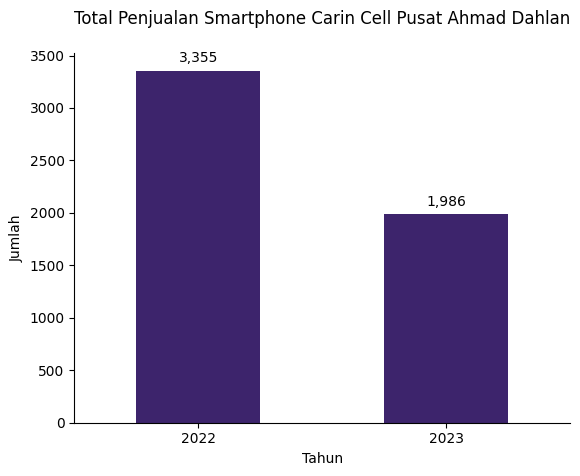

In [26]:
splot = df_vis.groupby(['Tahun'])['Merk'].count().plot.bar(color = '#3D246C')
plt.title('Total Penjualan Smartphone Carin Cell Pusat Ahmad Dahlan\n')
plt.xlabel('Tahun')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
for p in splot.patches:
        splot.annotate(format(p.get_height(), ',.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0, 9),
                    textcoords = 'offset points')
sns.despine(top=True, right=True)
plt.show()

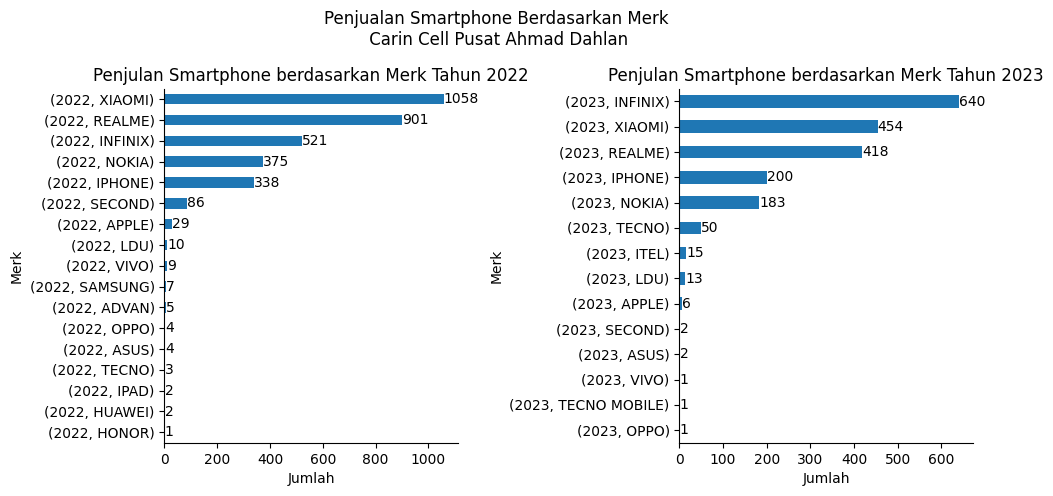

In [27]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(10, 5)

# Smartphone 2022
splot = df_vis.loc[df_vis['Tahun']==2022].groupby(['Tahun'])['Merk'].value_counts(ascending=True).plot(kind='barh', ax=ax[0])
fig.suptitle('Penjualan Smartphone Berdasarkan Merk\n Carin Cell Pusat Ahmad Dahlan')
ax[0].set_title('Penjulan Smartphone berdasarkan Merk Tahun 2022')
ax[0].set_xlabel('Jumlah')
ax[0].set_ylabel('Merk')
for c in splot.containers:
    # set the bar label
    splot.bar_label(c, fmt='%.0f', label_type='edge')
sns.despine(top=True, right=True)
# plt.show()

# Smartphone 2023
splot = df_vis.loc[df_vis['Tahun']==2023].groupby(['Tahun'])['Merk'].value_counts(ascending=True).plot(kind='barh', ax=ax[1])
ax[1].set_title('Penjulan Smartphone berdasarkan Merk Tahun 2023')
ax[1].set_xlabel('Jumlah')
ax[1].set_ylabel('Merk')
for c in splot.containers:
    # set the bar label
    splot.bar_label(c, fmt='%.0f', label_type='edge')
sns.despine(top=True, right=True)

fig.tight_layout(pad=1)
plt.show()

Pada tahun 2022 Xiaomi merupakan brand terbanyak di beli pada Carin Cell mencapai 1058 penjualan<br>
sedangkan pada tahun 2023 Infinix merupakan brand yang menduduki peringkat pertama hingga mencapai 640 penjualan

<H1>BAGAIMANA PENJUALAN PERBULAN?

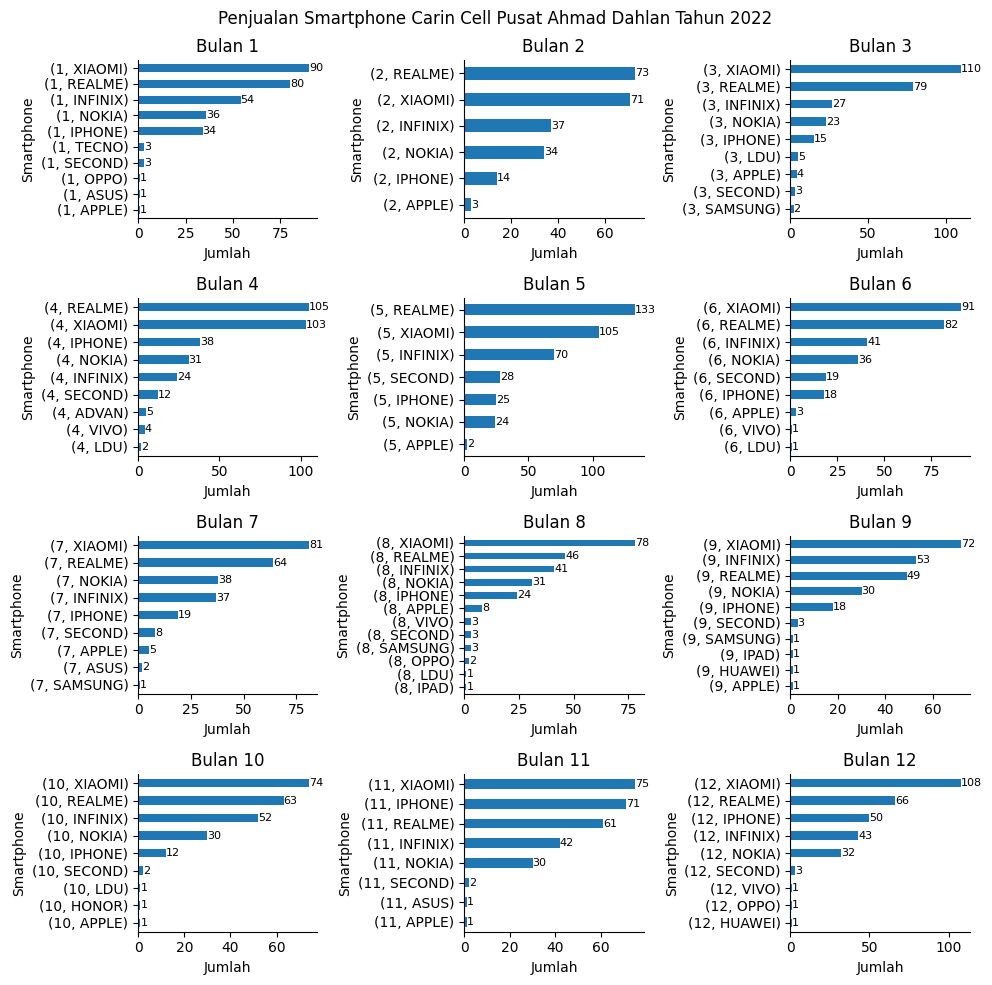

In [63]:
fig, ax = plt.subplots(4, 3)
fig.set_size_inches(10, 9)

# Bulan 1
splot = df_vis.loc[(df_vis['Bulan']==1) & (df_vis['Tahun']==2022)].groupby(['Bulan'])['Merk'].value_counts(ascending=True).plot(kind='barh', ax=ax[0,0], figsize=(10,10))
fig.suptitle('Penjualan Smartphone Carin Cell Pusat Ahmad Dahlan Tahun 2022')
# ax[0].tick_params(labelrotation=0)
ax[0,0].set_title('Bulan 1')
ax[0,0].set_ylabel('Smartphone')
ax[0,0].set_xlabel('Jumlah')
sns.despine(top=True, right=True)
for c in splot.containers:
    # set the bar label
    splot.bar_label(c, fmt='%.0f', label_type='edge', fontsize=8)

# Bulan 2
splot = df_vis.loc[(df_vis['Bulan']==2) & (df_vis['Tahun']==2022)].groupby(['Bulan'])['Merk'].value_counts(ascending=True).plot(kind='barh', ax=ax[0,1], figsize=(10,10))
ax[0,1].set_title('Bulan 2')
ax[0,1].set_ylabel('Smartphone')
ax[0,1].set_xlabel('Jumlah')
sns.despine(top=True, right=True)
for c in splot.containers:
    # set the bar label
    splot.bar_label(c, fmt='%.0f', label_type='edge', fontsize=8)

# Bulan 3
splot = df_vis.loc[(df_vis['Bulan']==3) & (df_vis['Tahun']==2022)].groupby(['Bulan'])['Merk'].value_counts(ascending=True).plot(kind='barh', ax=ax[0,2], figsize=(10,10))
ax[0,2].set_title('Bulan 3')
ax[0,2].set_ylabel('Smartphone')
ax[0,2].set_xlabel('Jumlah')
sns.despine(top=True, right=True)
for c in splot.containers:
    # set the bar label
    splot.bar_label(c, fmt='%.0f', label_type='edge', fontsize=8)

#########################################################
# Bulan 4
splot = df_vis.loc[(df_vis['Bulan']==4) & (df_vis['Tahun']==2022)].groupby(['Bulan'])['Merk'].value_counts(ascending=True).plot(kind='barh', ax=ax[1,0], figsize=(10,10))
fig.suptitle('Penjualan Smartphone Carin Cell Pusat Ahmad Dahlan Tahun 2022')
# ax[0].tick_params(labelrotation=0)
ax[1,0].set_title('Bulan 4')
ax[1,0].set_ylabel('Smartphone')
ax[1,0].set_xlabel('Jumlah')
sns.despine(top=True, right=True)
for c in splot.containers:
    # set the bar label
    splot.bar_label(c, fmt='%.0f', label_type='edge', fontsize=8)

# Bulan 5
splot = df_vis.loc[(df_vis['Bulan']==5) & (df_vis['Tahun']==2022)].groupby(['Bulan'])['Merk'].value_counts(ascending=True).plot(kind='barh', ax=ax[1,1], figsize=(10,10))
ax[1,1].set_title('Bulan 5')
ax[1,1].set_ylabel('Smartphone')
ax[1,1].set_xlabel('Jumlah')
sns.despine(top=True, right=True)
for c in splot.containers:
    # set the bar label
    splot.bar_label(c, fmt='%.0f', label_type='edge', fontsize=8)

# Bulan 6
splot = df_vis.loc[(df_vis['Bulan']==6) & (df_vis['Tahun']==2022)].groupby(['Bulan'])['Merk'].value_counts(ascending=True).plot(kind='barh', ax=ax[1,2], figsize=(10,10))
ax[1,2].set_title('Bulan 6')
ax[1,2].set_ylabel('Smartphone')
ax[1,2].set_xlabel('Jumlah')
sns.despine(top=True, right=True)
for c in splot.containers:
    # set the bar label
    splot.bar_label(c, fmt='%.0f', label_type='edge', fontsize=8)

#########################################################
# Bulan 7
splot = df_vis.loc[(df_vis['Bulan']==7) & (df_vis['Tahun']==2022)].groupby(['Bulan'])['Merk'].value_counts(ascending=True).plot(kind='barh', ax=ax[2,0], figsize=(10,10))
fig.suptitle('Penjualan Smartphone Carin Cell Pusat Ahmad Dahlan Tahun 2022')
# ax[0].tick_params(labelrotation=0)
ax[2,0].set_title('Bulan 7')
ax[2,0].set_ylabel('Smartphone')
ax[2,0].set_xlabel('Jumlah')
sns.despine(top=True, right=True)
for c in splot.containers:
    # set the bar label
    splot.bar_label(c, fmt='%.0f', label_type='edge', fontsize=8)

# Bulan 8
splot = df_vis.loc[(df_vis['Bulan']==8) & (df_vis['Tahun']==2022)].groupby(['Bulan'])['Merk'].value_counts(ascending=True).plot(kind='barh', ax=ax[2,1], figsize=(10,10))
ax[2,1].set_title('Bulan 8')
ax[2,1].set_ylabel('Smartphone')
ax[2,1].set_xlabel('Jumlah')
sns.despine(top=True, right=True)
for c in splot.containers:
    # set the bar label
    splot.bar_label(c, fmt='%.0f', label_type='edge', fontsize=8)

# Bulan 9
splot = df_vis.loc[(df_vis['Bulan']==9) & (df_vis['Tahun']==2022)].groupby(['Bulan'])['Merk'].value_counts(ascending=True).plot(kind='barh', ax=ax[2,2], figsize=(10,10))
ax[2,2].set_title('Bulan 9')
ax[2,2].set_ylabel('Smartphone')
ax[2,2].set_xlabel('Jumlah')
sns.despine(top=True, right=True)
for c in splot.containers:
    # set the bar label
    splot.bar_label(c, fmt='%.0f', label_type='edge', fontsize=8)

#########################################################
# Bulan 10
splot = df_vis.loc[(df_vis['Bulan']==10) & (df_vis['Tahun']==2022)].groupby(['Bulan'])['Merk'].value_counts(ascending=True).plot(kind='barh', ax=ax[3,0], figsize=(10,10))
fig.suptitle('Penjualan Smartphone Carin Cell Pusat Ahmad Dahlan Tahun 2022')
# ax[0].tick_params(labelrotation=0)
ax[3,0].set_title('Bulan 10')
ax[3,0].set_ylabel('Smartphone')
ax[3,0].set_xlabel('Jumlah')
sns.despine(top=True, right=True)
for c in splot.containers:
    # set the bar label
    splot.bar_label(c, fmt='%.0f', label_type='edge', fontsize=8)

# Bulan 11
splot = df_vis.loc[(df_vis['Bulan']==11) & (df_vis['Tahun']==2022)].groupby(['Bulan'])['Merk'].value_counts(ascending=True).plot(kind='barh', ax=ax[3,1], figsize=(10,10))
ax[3,1].set_title('Bulan 11')
ax[3,1].set_ylabel('Smartphone')
ax[3,1].set_xlabel('Jumlah')
sns.despine(top=True, right=True)
for c in splot.containers:
    # set the bar label
    splot.bar_label(c, fmt='%.0f', label_type='edge', fontsize=8)

# Bulan 12
splot = df_vis.loc[(df_vis['Bulan']==12) & (df_vis['Tahun']==2022)].groupby(['Bulan'])['Merk'].value_counts(ascending=True).plot(kind='barh', ax=ax[3,2], figsize=(10,10))
ax[3,2].set_title('Bulan 12')
ax[3,2].set_ylabel('Smartphone')
ax[3,2].set_xlabel('Jumlah')
sns.despine(top=True, right=True)
for c in splot.containers:
    # set the bar label
    splot.bar_label(c, fmt='%.0f', label_type='edge', fontsize=8)
fig.tight_layout()
plt.show()

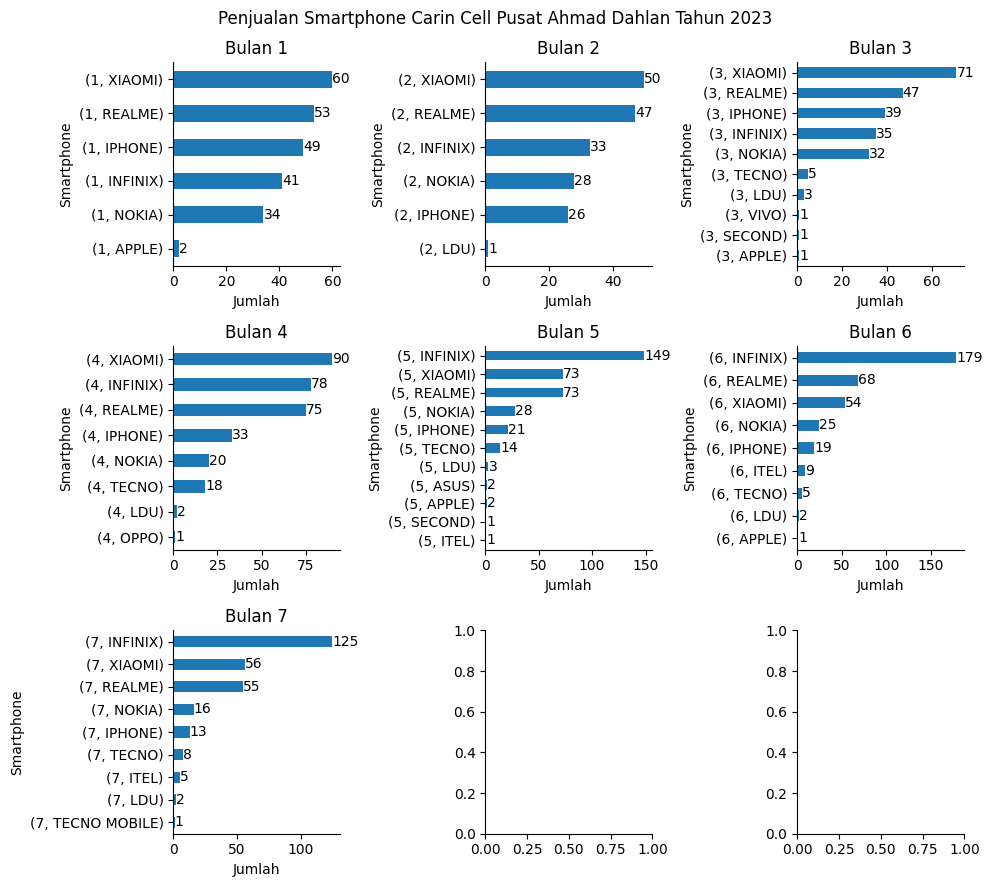

In [29]:
fig, ax = plt.subplots(3, 3)
fig.set_size_inches(10, 9)

# Bulan 1
splot = df_vis.loc[(df_vis['Bulan']==1) & (df_vis['Tahun']==2023)].groupby(['Bulan'])['Merk'].value_counts(ascending=True).plot(kind='barh', ax=ax[0,0])
fig.suptitle('Penjualan Smartphone Carin Cell Pusat Ahmad Dahlan Tahun 2023')
# ax[0].tick_params(labelrotation=0)
ax[0,0].set_title('Bulan 1')
ax[0,0].set_ylabel('Smartphone')
ax[0,0].set_xlabel('Jumlah')
sns.despine(top=True, right=True)
for c in splot.containers:
    # set the bar label
    splot.bar_label(c, fmt='%.0f', label_type='edge')

# Bulan 2
splot = df_vis.loc[(df_vis['Bulan']==2) & (df_vis['Tahun']==2023)].groupby(['Bulan'])['Merk'].value_counts(ascending=True).plot(kind='barh', ax=ax[0,1])
ax[0,1].set_title('Bulan 2')
ax[0,1].set_ylabel('Smartphone')
ax[0,1].set_xlabel('Jumlah')
sns.despine(top=True, right=True)
for c in splot.containers:
    # set the bar label
    splot.bar_label(c, fmt='%.0f', label_type='edge')

# Bulan 3
splot = df_vis.loc[(df_vis['Bulan']==3) & (df_vis['Tahun']==2023)].groupby(['Bulan'])['Merk'].value_counts(ascending=True).plot(kind='barh', ax=ax[0,2])
ax[0,2].set_title('Bulan 3')
ax[0,2].set_ylabel('Smartphone')
ax[0,2].set_xlabel('Jumlah')
sns.despine(top=True, right=True)
for c in splot.containers:
    # set the bar label
    splot.bar_label(c, fmt='%.0f', label_type='edge')

#########################################################
# Bulan 4
splot = df_vis.loc[(df_vis['Bulan']==4) & (df_vis['Tahun']==2023)].groupby(['Bulan'])['Merk'].value_counts(ascending=True).plot(kind='barh', ax=ax[1,0])
ax[1,0].set_title('Bulan 4')
ax[1,0].set_ylabel('Smartphone')
ax[1,0].set_xlabel('Jumlah')
sns.despine(top=True, right=True)
for c in splot.containers:
    # set the bar label
    splot.bar_label(c, fmt='%.0f', label_type='edge')

# Bulan 5
splot = df_vis.loc[(df_vis['Bulan']==5) & (df_vis['Tahun']==2023)].groupby(['Bulan'])['Merk'].value_counts(ascending=True).plot(kind='barh', ax=ax[1,1])
ax[1,1].set_title('Bulan 5')
ax[1,1].set_ylabel('Smartphone')
ax[1,1].set_xlabel('Jumlah')
sns.despine(top=True, right=True)
for c in splot.containers:
    # set the bar label
    splot.bar_label(c, fmt='%.0f', label_type='edge')

# Bulan 6
splot = df_vis.loc[(df_vis['Bulan']==6) & (df_vis['Tahun']==2023)].groupby(['Bulan'])['Merk'].value_counts(ascending=True).plot(kind='barh', ax=ax[1,2])
ax[1,2].set_title('Bulan 6')
ax[1,2].set_ylabel('Smartphone')
ax[1,2].set_xlabel('Jumlah')
sns.despine(top=True, right=True)
for c in splot.containers:
    # set the bar label
    splot.bar_label(c, fmt='%.0f', label_type='edge')

#########################################################
# Bulan 7
splot = df_vis.loc[(df_vis['Bulan']==7) & (df_vis['Tahun']==2023)].groupby(['Bulan'])['Merk'].value_counts(ascending=True).plot(kind='barh', ax=ax[2,0])
ax[2,0].set_title('Bulan 7')
ax[2,0].set_ylabel('Smartphone')
ax[2,0].set_xlabel('Jumlah')
sns.despine(top=True, right=True)
for c in splot.containers:
    # set the bar label
    splot.bar_label(c, fmt='%.0f', label_type='edge')

fig.tight_layout()
plt.show()

<h1>MELIHAT HASIL PENJUALAN SEMUA SMARTPHONE PERBULAN 2022/2023

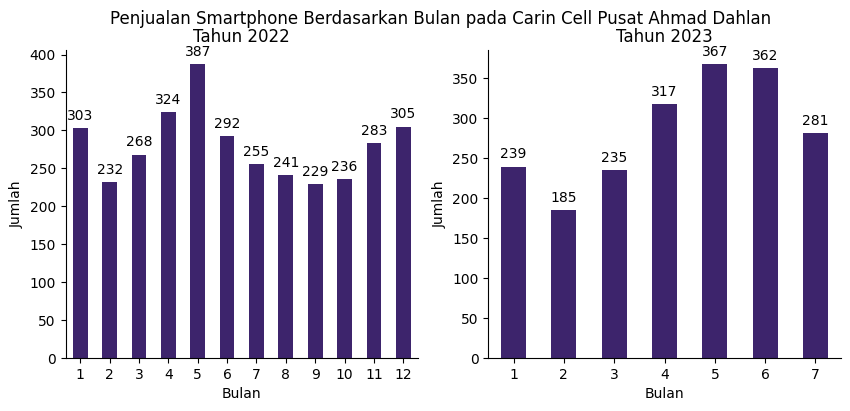

In [30]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(10, 4)

# Penjualan Smartphone perbulan tahun 2022
splot = df_vis.loc[df_vis['Tahun']==2022].groupby(['Bulan'])['Merk'].count().plot.bar(ax=ax[0], color='#3D246C')
fig.suptitle('Penjualan Smartphone Berdasarkan Bulan pada Carin Cell Pusat Ahmad Dahlan\n')
ax[0].set_title('Tahun 2022')
ax[0].set_xlabel('Bulan')
ax[0].set_ylabel('Jumlah')
ax[0].tick_params(labelrotation=0)
for p in splot.patches:
        splot.annotate(format(p.get_height(), ',.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0, 9),
                    textcoords = 'offset points')
sns.despine(top=True, right=True)

# Penjualan Smartphone perbulan tahun 2023
splot = df_vis.loc[df_vis['Tahun']==2023].groupby(['Bulan'])['Merk'].count().plot.bar(ax=ax[1], color='#3D246C')
ax[1].set_title('Tahun 2023')
ax[1].set_xlabel('Bulan')
ax[1].set_ylabel('Jumlah')
ax[1].tick_params(labelrotation=0)
for p in splot.patches:
        splot.annotate(format(p.get_height(), ',.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0, 9),
                    textcoords = 'offset points')
sns.despine(top=True, right=True)
plt.show()

<H1>KMEANS

In [31]:
# PENTING BUAT DAPAT ID
# df['Count'] = df.groupby(['Smartphone', 'Jumlah'])['Id'].transform('count')
# df.drop_duplicates(subset=['Smartphone'],inplace=True)
# df.sort_values(ascending=False, by='Count')

In [32]:
df_intepret = df.copy()

In [33]:
# Pembuatan kolom terjual
df_intepret['Count'] = df_intepret.groupby(['Smartphone', 'Jumlah'])['Id'].transform('count')
df_intepret.drop_duplicates(subset=['Smartphone'],inplace=True)
df_intepret = df_intepret[['Id', 'Smartphone', 'Merk', 'Warna', 'Ukuran', 'Count', 'Harga']] # Tambah Harga (nanti dihapus harganya)
df_intepret.sort_values(ascending=False, by='Count', inplace=True)

In [34]:
# Perubahan nama Count menjadi Terjual
df_intepret.rename(columns = {'Count':'Terjual'}, inplace = True)
df_intepret

,Id,Smartphone,Merk,Warna,Ukuran,Terjual,Harga
3572,3573,IPHONE 11 TAM,IPHONE,UNGU,128,165,11500000
7115,7116,REALME C35,REALME,HIJAU,128,158,2400000
6761,6762,REALME C31,REALME,PERAK,64,150,1800000
5976,5977,XIAOMI REDMI NOTE 11,XIAOMI,BIRU,128,122,2900000
132,133,XIAOMI REDMI 10,XIAOMI,ABU,128,121,2500000
...,...,...,...,...,...,...,...
8736,8737,REALME 9 PRO FAJAR,REALME,HIJAU,128,1,3700000
8482,8483,INFINIX HOT 10 JADE,INFINIX,HITAM,64,1,1250000
22052,22053,SECOND IPHONE 13 PRO ( EX INTER ),SECOND,EMAS,128,1,14700000
7981,7982,IPHONE 7 PLUS,IPHONE,EMAS,32,1,1800000


<h2>Transformasi QCUT</h2>

In [35]:
# Jika bins menggunakan berdasarkan harga
# Murah
# Standar
# Mahal

In [36]:
# Kelompok Terjual dan Harga
df_intepret["Kelompok_Terjual"] = pd.qcut(df_intepret["Terjual"],3,labels=['Kurang Laris', 'Laris', 'Sangat Laris'])
df_intepret["Kelompok_Harga"] = pd.qcut(df_intepret["Harga"],3,labels=['Murah', 'Standar', 'Mahal'])

In [37]:
pd.qcut(df_intepret["Terjual"],3).loc[:]

3572     (7.0, 165.0]
7115     (7.0, 165.0]
6761     (7.0, 165.0]
5976     (7.0, 165.0]
132      (7.0, 165.0]
             ...     
8736     (0.999, 2.0]
8482     (0.999, 2.0]
22052    (0.999, 2.0]
7981     (0.999, 2.0]
13213    (0.999, 2.0]
Name: Terjual, Length: 390, dtype: category
Categories (3, interval[float64, right]): [(0.999, 2.0] < (2.0, 7.0] < (7.0, 165.0]]

In [38]:
print('Kelompok Harga')
print('Mahal = Rp. ', df_intepret[df_intepret['Kelompok_Harga'] == 'Mahal']['Harga'].min(), '- Rp.', df_intepret[df_intepret['Kelompok_Harga'] == 'Mahal']['Harga'].max())
print('Standar = Rp. ', df_intepret[df_intepret['Kelompok_Harga'] == 'Standar']['Harga'].min(), '- Rp.', df_intepret[df_intepret['Kelompok_Harga'] == 'Standar']['Harga'].max())
print('Murah = Rp. ', df_intepret[df_intepret['Kelompok_Harga'] == 'Murah']['Harga'].min(), '- Rp.', df_intepret[df_intepret['Kelompok_Harga'] == 'Murah']['Harga'].max())

print('\nKelompok Terjual')
print('Sangat Laris ',df_intepret[df_intepret['Kelompok_Terjual'] == 'Sangat Laris']['Terjual'].min(), '-', df_intepret[df_intepret['Kelompok_Terjual'] == 'Sangat Laris']['Terjual'].max())
print('Laris ',df_intepret[df_intepret['Kelompok_Terjual'] == 'Laris']['Terjual'].min(), '-', df_intepret[df_intepret['Kelompok_Terjual'] == 'Laris']['Terjual'].max())
print('Kurang Laris ',df_intepret[df_intepret['Kelompok_Terjual'] == 'Kurang Laris']['Terjual'].min(), '-', df_intepret[df_intepret['Kelompok_Terjual'] == 'Kurang Laris']['Terjual'].max())

Kelompok Harga
Mahal = Rp.  5950000 - Rp. 32999000
Standar = Rp.  2500000 - Rp. 5800000
Murah = Rp.  0 - Rp. 2400000

Kelompok Terjual
Sangat Laris  8 - 165
Laris  3 - 7
Kurang Laris  1 - 2


<h2>Batas QCUT</h2>

In [39]:
# # Pembuatan kategori
# df_intepret.loc[df_intepret['Terjual'] >= 50, 'Kategori'] = "Sangat Laris"
# df_intepret.loc[(df_intepret['Terjual']>=20) & (df_intepret['Terjual'] < 50), 'Kategori'] = "Laris"
# df_intepret.loc[df_intepret['Terjual'] < 20, 'Kategori'] = "Kurang Laris"
# # df_intepret.reset_index(drop=True, inplace=True)
# df_intepret

<H1>Transformasi Data

In [40]:
# # Merubah data kategori menjadi numerik
df_intepret['LE_Kategori'] = df_intepret['Kelompok_Terjual']
df_intepret['LE_Kategori'].replace(['Sangat Laris', 'Laris', 'Kurang Laris'], [1,2,3], inplace=True)

In [41]:
df_intepret

,Id,Smartphone,Merk,Warna,Ukuran,Terjual,Harga,Kelompok_Terjual,Kelompok_Harga,LE_Kategori
3572,3573,IPHONE 11 TAM,IPHONE,UNGU,128,165,11500000,Sangat Laris,Mahal,1
7115,7116,REALME C35,REALME,HIJAU,128,158,2400000,Sangat Laris,Murah,1
6761,6762,REALME C31,REALME,PERAK,64,150,1800000,Sangat Laris,Murah,1
5976,5977,XIAOMI REDMI NOTE 11,XIAOMI,BIRU,128,122,2900000,Sangat Laris,Standar,1
132,133,XIAOMI REDMI 10,XIAOMI,ABU,128,121,2500000,Sangat Laris,Standar,1
...,...,...,...,...,...,...,...,...,...,...
8736,8737,REALME 9 PRO FAJAR,REALME,HIJAU,128,1,3700000,Kurang Laris,Standar,3
8482,8483,INFINIX HOT 10 JADE,INFINIX,HITAM,64,1,1250000,Kurang Laris,Murah,3
22052,22053,SECOND IPHONE 13 PRO ( EX INTER ),SECOND,EMAS,128,1,14700000,Kurang Laris,Mahal,3
7981,7982,IPHONE 7 PLUS,IPHONE,EMAS,32,1,1800000,Kurang Laris,Murah,3


In [42]:
x = np.array(df_intepret[['Terjual', 'LE_Kategori']]).reshape(-1,2) # mengubah data 1 dimensi menjadi 2 dimensi

In [43]:
x[:,1]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

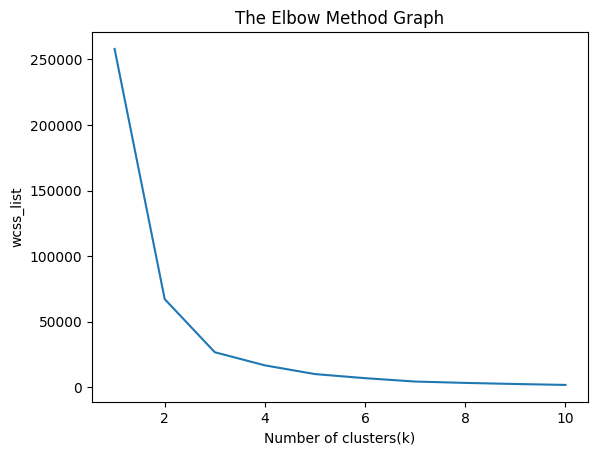

In [44]:
wcss_list= []

# Menggunakan iterasi dari 1 sampai 10 untuk mencari elbow
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state= 42, n_init=10)
    kmeans.fit(x)
    wcss_list.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss_list)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters(k)')
plt.ylabel('wcss_list')
plt.show()

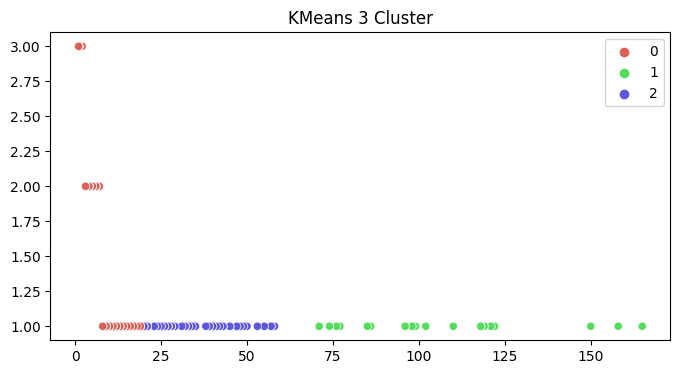

In [45]:
# KM = 3
# membuat objek KMeans
km3 = KMeans(n_clusters=3, random_state=42, n_init=10)
km3.fit(x)

# menambahkan kolom label pada dataset
km3.labels_

# membuat plot KMeans dengan 3 klaster
plt.figure(figsize=(8,4))
sns.scatterplot(x= x[:,0], y=x[:,1], hue=km3.labels_, palette=sns.color_palette('hls', 3))
plt.title('KMeans 3 Cluster')
plt.show()

In [46]:
df_intepret['Cluster'] = km3.labels_
df_intepret

,Id,Smartphone,Merk,Warna,Ukuran,Terjual,Harga,Kelompok_Terjual,Kelompok_Harga,LE_Kategori,Cluster
3572,3573,IPHONE 11 TAM,IPHONE,UNGU,128,165,11500000,Sangat Laris,Mahal,1,1
7115,7116,REALME C35,REALME,HIJAU,128,158,2400000,Sangat Laris,Murah,1,1
6761,6762,REALME C31,REALME,PERAK,64,150,1800000,Sangat Laris,Murah,1,1
5976,5977,XIAOMI REDMI NOTE 11,XIAOMI,BIRU,128,122,2900000,Sangat Laris,Standar,1,1
132,133,XIAOMI REDMI 10,XIAOMI,ABU,128,121,2500000,Sangat Laris,Standar,1,1
...,...,...,...,...,...,...,...,...,...,...,...
8736,8737,REALME 9 PRO FAJAR,REALME,HIJAU,128,1,3700000,Kurang Laris,Standar,3,0
8482,8483,INFINIX HOT 10 JADE,INFINIX,HITAM,64,1,1250000,Kurang Laris,Murah,3,0
22052,22053,SECOND IPHONE 13 PRO ( EX INTER ),SECOND,EMAS,128,1,14700000,Kurang Laris,Mahal,3,0
7981,7982,IPHONE 7 PLUS,IPHONE,EMAS,32,1,1800000,Kurang Laris,Murah,3,0


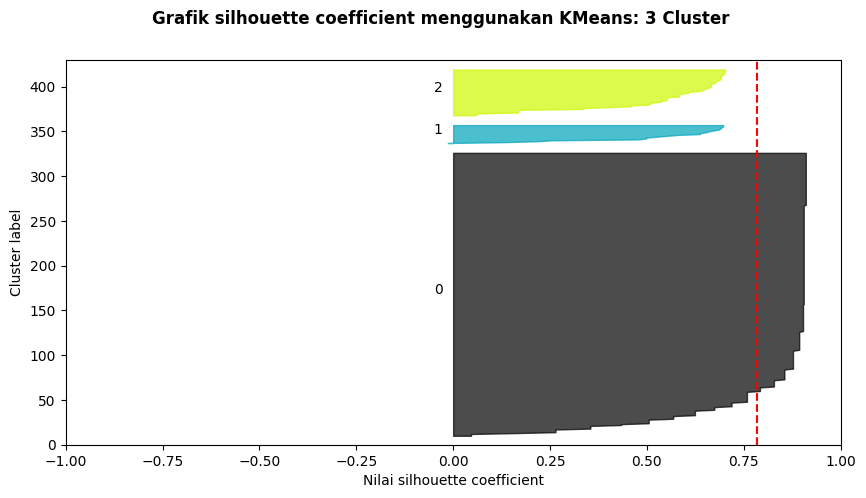

In [47]:
# https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a
import matplotlib.cm as cm
from IPython.display import display
from sklearn import metrics # for evaluations
cmap = cm.get_cmap("Spectral")

y_pred = km3.labels_
range_n_clusters = [3]

# For each number of clusters, perform Silhouette analysis and visualize the results.
for n_clusters in range_n_clusters:

    # Compute the Silhouette Coefficient for each sample.
    s = metrics.silhouette_samples(x, y_pred)

    # Compute the mean Silhouette Coefficient of all data points.
    s_mean = metrics.silhouette_score(x, y_pred)

    # For plot configuration -----------------------------------------------------------------------------------
    fig, (ax1) = plt.subplots()
    fig.set_size_inches(10, 5)

    # Configure plot.
    plt.suptitle('Grafik silhouette coefficient menggunakan KMeans: {} Cluster'.format(n_clusters),
                 fontsize=12, fontweight='bold')

    # Configure 1st subplot.
    ax1.set_xlabel("Nilai silhouette coefficient")
    ax1.set_ylabel("Cluster label")
    ax1.set_xlim([-1, 1])
    ax1.set_ylim([0, len(x) + (n_clusters + 1) * 10])

    # For 1st subplot ------------------------------------------------------------------------------------------

    # Plot Silhouette Coefficient for each sample
    y_lower = 10
    for i in range(n_clusters):
        ith_s = s[y_pred == i]
        ith_s.sort()
        size_cluster_i = ith_s.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_s,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    # Plot the mean Silhouette Coefficient using red vertical dash line.
    ax1.axvline(x=s_mean, color="red", linestyle="--")

In [48]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_avg = silhouette_score(x, km3.labels_)
print('Silhouette Coefficient:', round(silhouette_avg, 2))

Silhouette Coefficient: 0.78


<h1>Pisah Dataframe Per Cluster</h1>

In [49]:
 cluster_0 = df_intepret.loc[df_intepret['Cluster']==0]
 cluster_1 = df_intepret.loc[df_intepret['Cluster']==1]
 cluster_2 = df_intepret.loc[df_intepret['Cluster']==2]

<H1>VISUALISASI INTEPRETASI

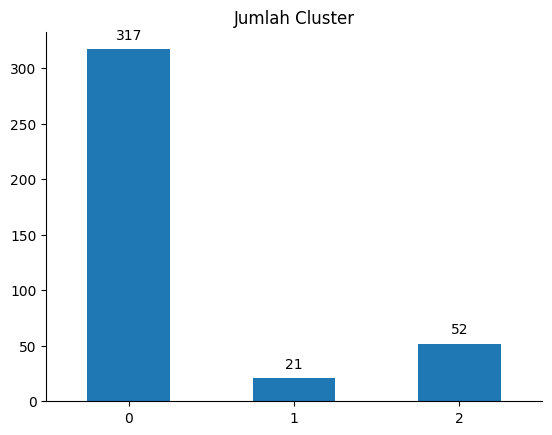

In [50]:
splot = df_intepret['Cluster'].value_counts().sort_index().plot.bar()
plt.title('Jumlah Cluster')
plt.xticks(rotation=0)
for p in splot.patches:
  splot.annotate(format(p.get_height(), '.0f'),
   (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha = 'center',
                  va = 'center',
                  xytext = (0, 10),
                  textcoords = 'offset points')
sns.despine(top=True, right=True)
plt.show()

<h1>Cluster 0

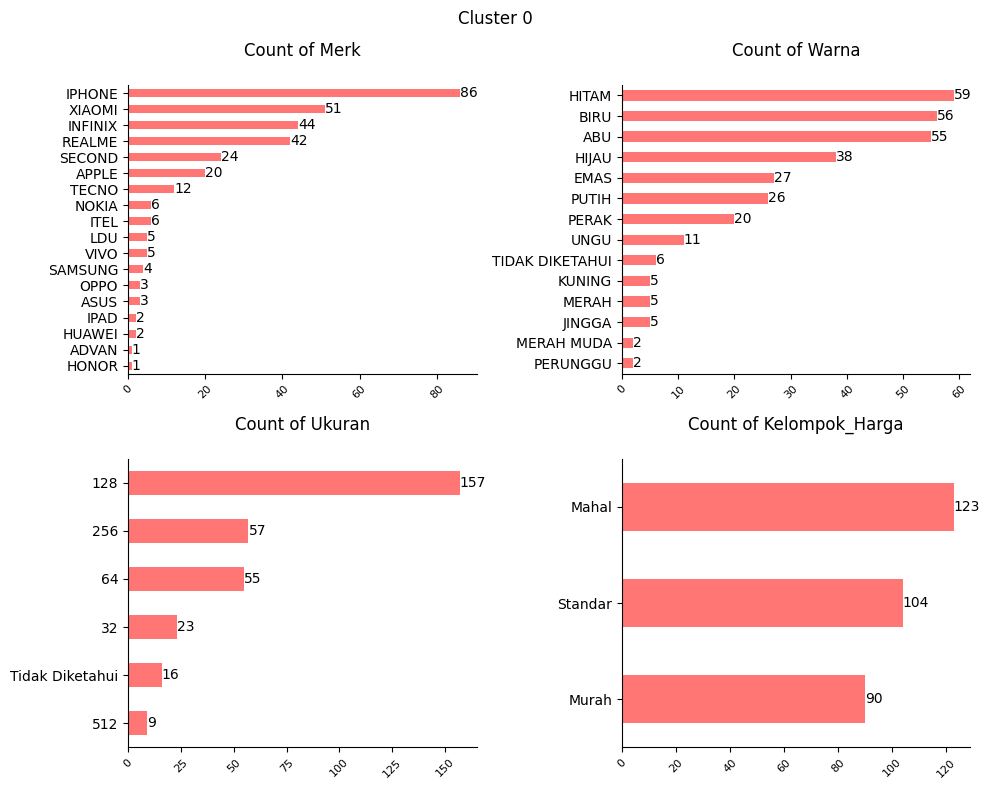

In [51]:
vis_ax(cluster_0, ['Merk', 'Warna', 'Ukuran', 'Kelompok_Harga'], 2, 2)

<h1>Cluster 1

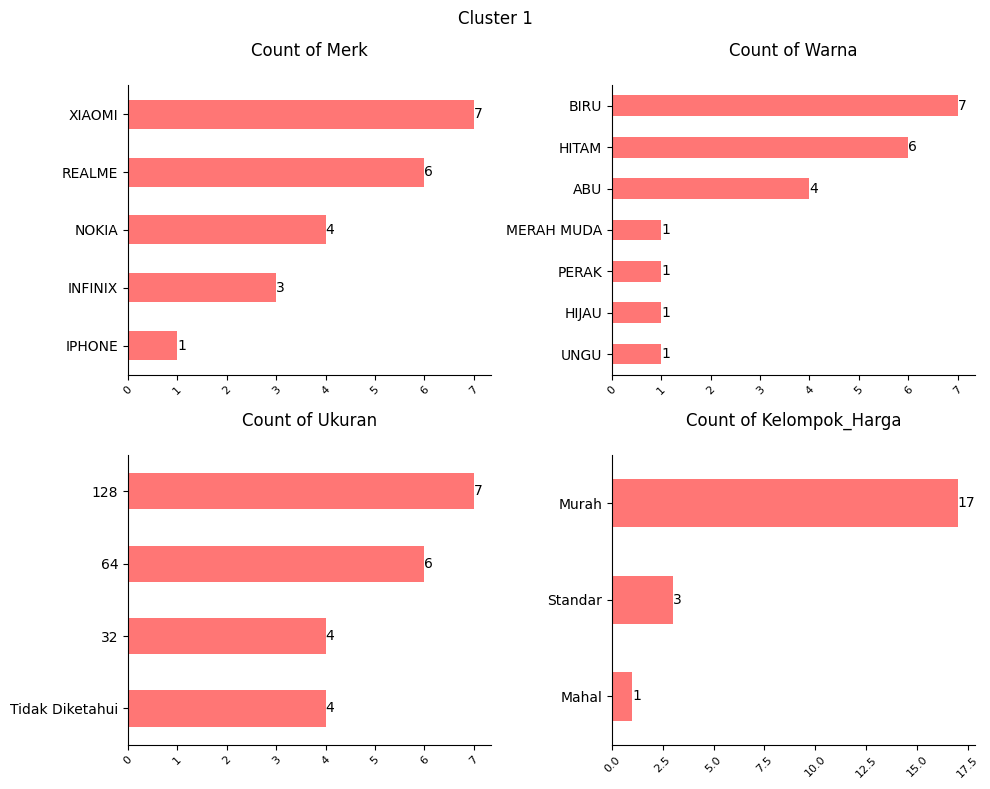

In [52]:
vis_ax(cluster_1, ['Merk', 'Warna', 'Ukuran', 'Kelompok_Harga'], 2, 2)

<h1>Cluster 2

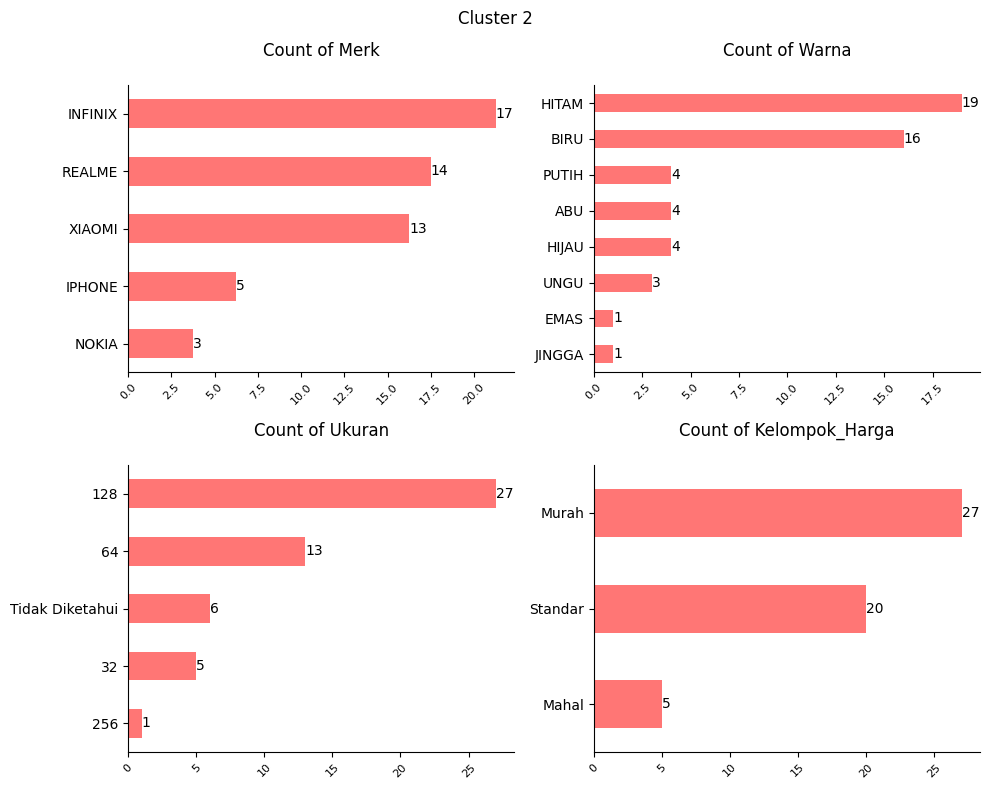

In [53]:
vis_ax(cluster_2, ['Merk', 'Warna', 'Ukuran', 'Kelompok_Harga'], 2, 2)

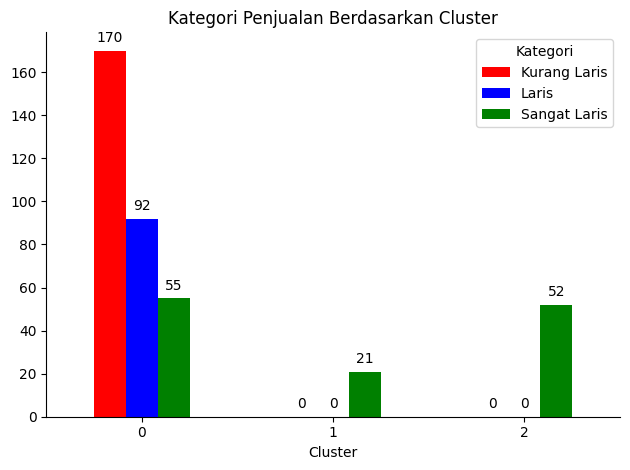

In [57]:
splot = df_intepret.groupby(['Cluster'])['Kelompok_Terjual'].value_counts().unstack().plot.bar(color=['Red', 'Blue', 'Green'])
sns.despine(right=True,top = True)
plt.legend(loc='center right')
plt.xticks(rotation=0)
plt.title('Kategori Penjualan Berdasarkan Cluster')
plt.xlabel('Cluster')
plt.legend(title='Kategori')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')
plt.tight_layout()
plt.show()

<h1>CATATAN VISUALISASI

In [ ]:
# # Menyiapkan kolom kategorikal
# kolom_kategorikal = ['Merk','Warna','Ukuran']

# # Membuat canvas
# fig, axs = plt.subplots(3,1,figsize=(7,10))

# # Membuat plot untuk setiap kolom kategorikal
# for i, kol in enumerate(kolom_kategorikal):
#     # Membuat Plot
#     splot = df_intepret.loc[df_intepret['Cluster']==2][kol].value_counts().plot(kind='barh', ax=axs[i], color='#57db94')
#     axs[i].set_title('\nCluster 2, Count Plot %s\n'%(kol), fontsize=15, color='#57db94')

#     # Memberikan anotasi
#     #  Barh
#     for c in splot.containers:
#       splot.bar_label(c, fmt='%.0f', label_type='edge')
#     # Bar
#     # for p in axs[i].patches:
#     #     axs[i].annotate(format(p.get_height(), '.0f'),
#     #                     (p.get_x() + p.get_width() / 2., p.get_height()),
#     #                     ha = 'center',
#     #                     va = 'center',
#     #                     xytext = (0, 10),
#     #                     textcoords = 'offset points')

#     # Setting Plot
#     sns.despine(right=True,top = True)
#     # axs[i].axes.yaxis.set_visible(False)
#     # plt.setp(ax)
#     plt.tight_layout()

# # Tampilkan plot
# plt.show()